<a href="https://colab.research.google.com/github/mobarakol/tutorial_notebooks/blob/main/stable_diffusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Stable Diffusion Model
src: https://github.com/woctezuma/stable-diffusion-colab<br>
other src: https://github.com/CompVis/stable-diffusion<br>
paper: https://arxiv.org/abs/2112.10752<br>
paper:  Stable Diffusion Safety Filter (https://arxiv.org/pdf/2210.04610.pdf)

Installing libs

In [1]:
%pip install --quiet --upgrade diffusers transformers scipy mediapy accelerate ftfy spacy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.9/524.9 KB 27.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 93.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 KB 21.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.4/182.4 KB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.7 MB/s eta 0:00:00


Loading Model and Weights Trained on "MS-COCO" and "LAION" Dataset

In [2]:
import subprocess

# The xformers package is mandatory to be able to create several 768x768 images.
github_url = "https://github.com/brian6091/xformers-wheels"
xformer_id = "0.0.15.dev0+4c06c79"
xformers_wheels = f"xformers-{xformer_id}.d20221205-cp38-cp38-linux_x86_64.whl"

# Install xformers using pre-compiled Python wheels
%pip install -q {github_url}/releases/download/{xformer_id}/{xformers_wheels}

# model_id = "stabilityai/stable-diffusion-2-1-base"
model_id = "stabilityai/stable-diffusion-2-1"

from diffusers import PNDMScheduler, DDIMScheduler, LMSDiscreteScheduler, EulerDiscreteScheduler, DPMSolverMultistepScheduler

scheduler = DPMSolverMultistepScheduler.from_pretrained(model_id, subfolder="scheduler")

import mediapy as media
import torch
from diffusers import StableDiffusionPipeline

device = "cuda"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    scheduler=scheduler,
    torch_dtype=torch.float16,
    revision="fp16",
    )
pipe = pipe.to(device)
pipe.enable_xformers_memory_efficient_attention()

if model_id.endswith('-base'):
  image_length = 512
else:
  image_length = 768

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.4/47.4 MB 17.5 MB/s eta 0:00:00


Downloading:   0%|          | 0.00/345 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/517 [00:00<?, ?B/s]

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/351 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/628 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/681M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/525k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/460 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/819 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/999 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.73G [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/167M [00:00<?, ?B/s]

Generating Image from Text: Example 2

  0%|          | 0/25 [00:00<?, ?it/s]


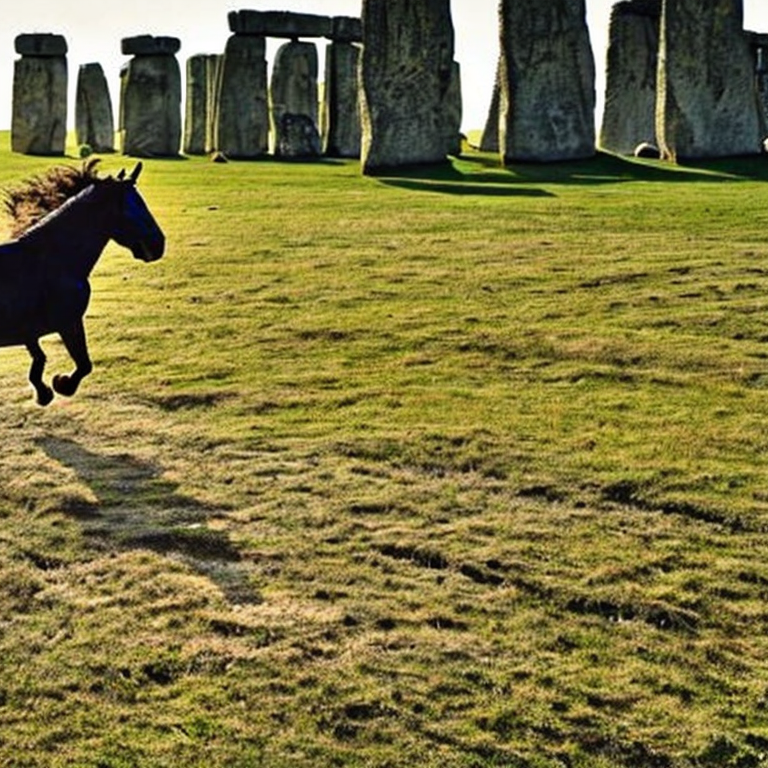
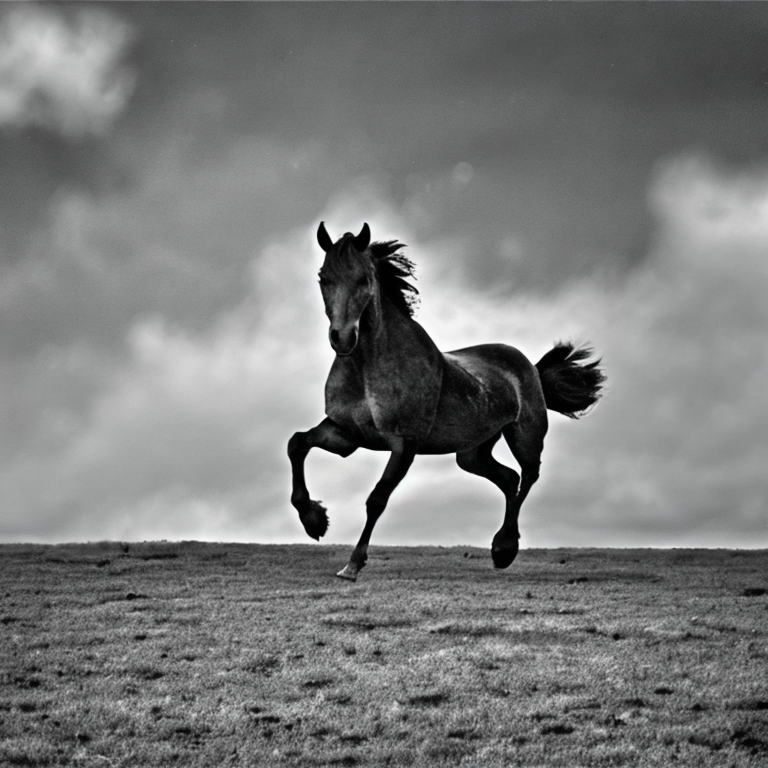

In [4]:
prompt = "Horse running in Stonehenge"
num_images = 2

images = pipe(
    prompt,
    num_images_per_prompt=num_images,
    guidance_scale=9,
    num_inference_steps=25,
    height=image_length,
    width=image_length,
    ).images
    
media.show_images(images)
# images[0].save("output.jpg")

  0%|          | 0/25 [00:00<?, ?it/s]


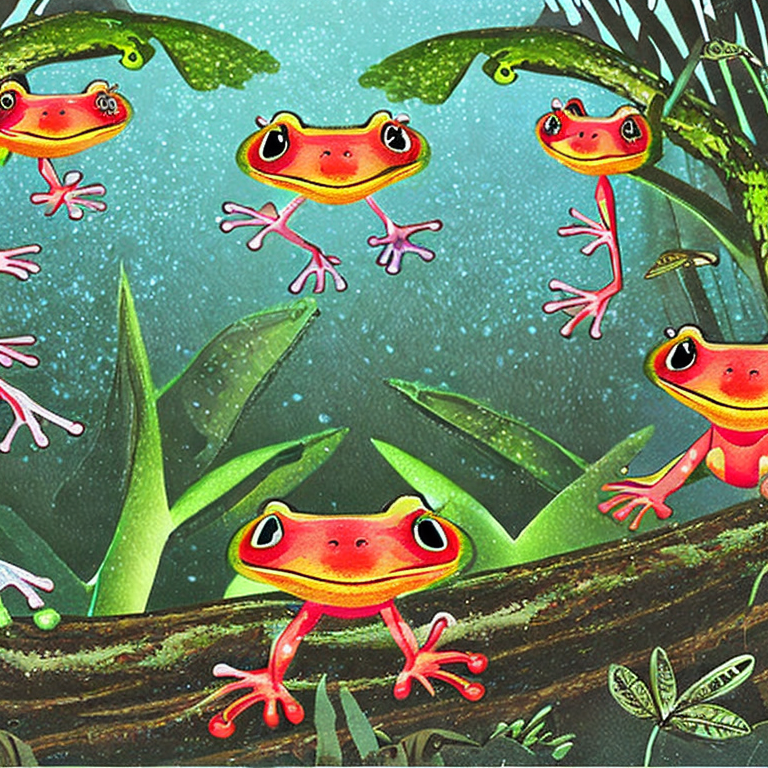
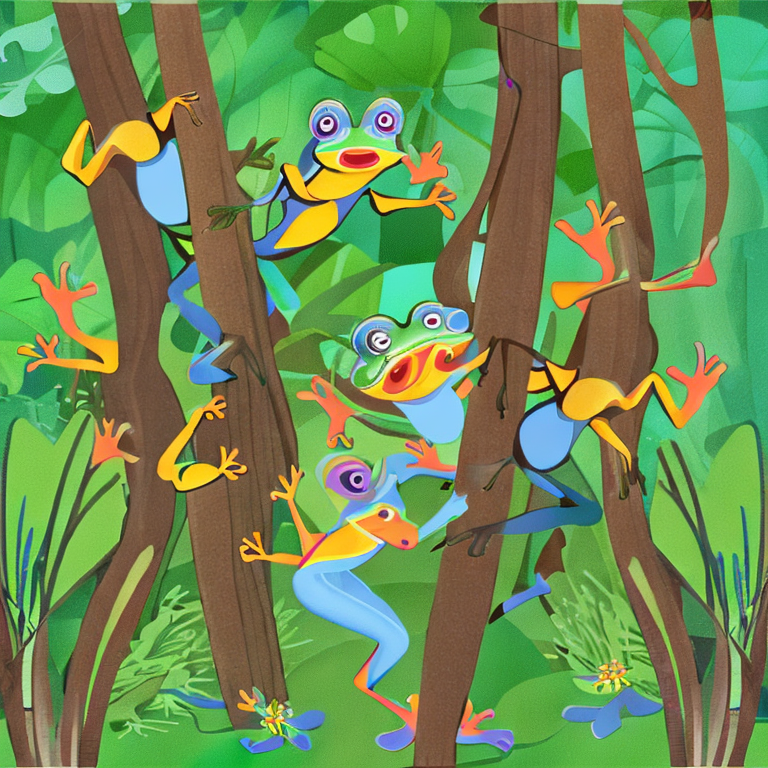

In [5]:
prompt = "Group of frogs dancing in the forest"
num_images = 2

images = pipe(
    prompt,
    num_images_per_prompt=num_images,
    guidance_scale=9,
    num_inference_steps=25,
    height=image_length,
    width=image_length,
    ).images
    
media.show_images(images)